# 📊 Projeto: Análise de Evasão de Clientes da Telecom X

Este projeto faz parte do Challenge Telecom X proposto pela trilha de Data Science do Oracle Next Education (ONE). O objetivo principal é realizar uma análise exploratória dos dados de clientes da Telecom X para entender os fatores relacionados ao churn (evasão de clientes), apoiando futuras estratégias de retenção.

---





## 📌 Etapa 1: Extração dos Dados (E - Extract)

Nesta etapa, realizaremos a extração dos dados no formato `.json`, disponíveis por meio de uma URL pública no GitHub. A ideia é simular a coleta de dados de uma API, mesmo que a fonte seja um arquivo estático.

### 🧰 Importação de Bibliotecas

As bibliotecas abaixo são essenciais para a execução do projeto:

- `pandas` e `numpy`: para manipulação e análise dos dados;
- `matplotlib.pyplot` e `seaborn`: para criação de gráficos e visualizações;
- `scipy.stats`: para análises estatísticas exploratórias;
- `warnings`: para ocultar avisos que não afetam a execução;
- `plt.style.use("ggplot")`: configura um estilo mais limpo e visualmente agradável para os gráficos;
- `sns.set_palette("Set2")`: define uma paleta suave para os gráficos do Seaborn.


In [1]:
# 🧰 Importação de bibliotecas principais

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Estatísticas e testes
from scipy import stats

# Configuração de estilo para os gráficos
plt.style.use("ggplot")
sns.set_palette("Set2")

# Ignorar avisos desnecessários
import warnings
warnings.filterwarnings('ignore')

In [3]:
# URL do arquivo JSON (emula um endpoint de API)
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

In [5]:
# Carregando os dados
df = pd.read_json(url)

In [6]:
# Exibindo as primeiras linhas
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### 📋 Visão Geral dos Dados

Vamos inspecionar a estrutura inicial dos dados, checar o tamanho do DataFrame, tipos de colunas e verificar se existem dados ausentes.



In [7]:
# Formato do DataFrame
print("Formato do DataFrame:", df.shape)

Formato do DataFrame: (7267, 6)


In [8]:
# Tipos de dados
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [9]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [10]:
# Amostragem aleatória
df.sample(5)

,customerID,Churn,customer,phone,internet,account
5601,7649-PHJVR,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'One year', 'PaperlessBilling': '..."
2011,2842-BCQGE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
1419,2040-VZIKE,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5382,7351-MHQVU,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5409,7398-LXGYX,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## 🔧 Etapa 2: Transformação dos Dados (T - Transform)

Agora que os dados foram extraídos com sucesso, é hora de entendê-los mais a fundo e prepará-los para as próximas etapas da análise. Nesta etapa vamos:

- Compreender a estrutura das colunas e tipos de dados;
- Identificar e tratar inconsistências;
- Expandir colunas compostas (como dicionários aninhados);
- Criar novas variáveis úteis, como o faturamento diário;
- (Opcional) Padronizar e transformar os dados para facilitar a análise futura.

✅ Ao final desta etapa, teremos um dataset limpo, estruturado e pronto para análise exploratória.

---

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assisnatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

### 🧩 2.1 Conhecendo a Estrutura dos Dados

Algumas colunas do dataset não estão planas, ou seja, contêm estruturas do tipo `dict` com várias sub-informações. Vamos descompactar essas colunas e integrá-las ao DataFrame principal para facilitar a análise.

Além disso, faremos uma análise exploratória rápida para:

- Verificar o tipo de cada coluna;
- Observar categorias disponíveis em variáveis qualitativas;
- Consultar o dicionário de dados oficial, caso necessário.

---

In [11]:
# 📋 Verificando o tipo de dado de cada coluna
print("Tipos de dados por coluna:\n")
print(df.dtypes)

Tipos de dados por coluna:

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [12]:
# 🔍 Verificando amostras das colunas com dicionários
# Vamos ver o conteúdo da primeira linha de cada coluna aninhada

print("Exemplo da coluna 'customer':\n", df["customer"].iloc[0])
print("\nExemplo da coluna 'phone':\n", df["phone"].iloc[0])
print("\nExemplo da coluna 'internet':\n", df["internet"].iloc[0])
print("\nExemplo da coluna 'account':\n", df["account"].iloc[0])

Exemplo da coluna 'customer':
 {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}

Exemplo da coluna 'phone':
 {'PhoneService': 'Yes', 'MultipleLines': 'No'}

Exemplo da coluna 'internet':
 {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}

Exemplo da coluna 'account':
 {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}


### 🧩 Conclusões: 2.1 Conhecendo a Estrutura dos Dados

Nesta etapa, exploramos a estrutura interna do dataset e identificamos colunas que precisam de transformação futura.

- O dataset possui 7267 registros e 6 colunas.
- Das 6 colunas, 4 contêm dados estruturados como dicionários:
  - `customer`, `phone`, `internet`, `account`
- Essas colunas precisam ser "explodidas" futuramente para facilitar a análise.

No momento, apenas identificamos essa estrutura. As transformações serão feitas na próxima etapa (2.3).


### 🧹 2.2 Verificando Inconsistências

Nesta etapa, procuramos:

- Valores nulos;
- Duplicidades;
- Categorias inconsistentes (ex: espaços em branco, letras maiúsculas e minúsculas misturadas);
- Tipos incorretos (ex: números como string, datas não reconhecidas, etc.).

---

In [13]:
# 🔍 Verificando a quantidade de valores nulos por coluna
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [14]:
# 💯 Porcentagem de valores nulos por coluna
(df.isnull().sum() / df.shape[0]) * 100

,0
customerID,0.0
Churn,0.0
customer,0.0
phone,0.0
internet,0.0
account,0.0


In [17]:
# 🔁 Verificando se há IDs de cliente duplicados
df['customerID'].duplicated().sum()

np.int64(0)

In [18]:
# 🔍 Verificando os valores únicos de 'Churn'
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [19]:
# 📊 Frequência de valores de 'Churn'
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [20]:
# 🧪 Verificando se há campos com string vazia em todas as colunas de nível superior
for col in df.columns:
    if df[col].dtype == 'object':
        count_empty = (df[col] == '').sum()
        if count_empty > 0:
            print(f"Coluna '{col}' possui {count_empty} valores vazios ('').")

Coluna 'Churn' possui 224 valores vazios ('').


### 🔧 2.3 Tratando as Inconsistências

Uma vez identificados os problemas, vamos corrigi-los:

- Preencher ou excluir valores ausentes (caso necessário);
- Corrigir categorias (padronizando letras, removendo espaços);
- Explodir os dicionários em colunas separadas;
- Garantir coerência nos tipos de dados.

---

In [21]:
# 🧹 Substituindo valores vazios por NaN em 'Churn'
df['Churn'] = df['Churn'].replace('', np.nan)

# 🔁 Verificando novamente os valores únicos
df['Churn'].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869
NaN,224


In [22]:
# 🧱 Separando as colunas que estão em formato de dicionário
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

In [23]:
# 🔗 Concatenando os dados transformados ao DataFrame original
df = pd.concat([
    df.drop(columns=['customer', 'phone', 'internet', 'account']),
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

# 👀 Visualizando as 5 primeiras linhas do novo DataFrame
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [24]:
# 📏 Verificando o novo shape
df.shape

(7267, 21)

### 💡 2.4 Criando a Coluna `Contas_Diarias`

Para ter uma visão mais granular sobre o faturamento dos clientes, criaremos a coluna `Contas_Diarias`, calculando o valor médio diário com base na coluna `Charges.Monthly`:

```python
df["Contas_Diarias"] = df["Charges.Monthly"] / 30

In [25]:
# 🔍 Conferindo os tipos novamente
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [26]:
# 🔁 Convertendo Charges.Total para float (coercivo)
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# 🔍 Verificando se houve valores não conversíveis (viraram NaN)
df['Charges.Total'].isnull().sum()

np.int64(11)

In [27]:
# 🔍 Conferindo os tipos novamente
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [28]:
# 💡 Criando a coluna Contas_Diarias
df['Contas_Diarias'] = df['Charges.Monthly'] / 30

# 👀 Visualizando as 5 primeiras linhas
df[['Charges.Monthly', 'Contas_Diarias']].head()

,Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


### 🔄 2.5 Padronização e Transformação de Dados (Opcional)
Caso necessário, aplicaremos:

- Tradução ou renomeação de colunas;
- Conversão de variáveis categóricas para numéricas (por exemplo, "Yes"/"No" → 1/0);
- Padronização de nomenclaturas (ex: substituição de espaços por underscore, tudo em minúsculas).

Esta etapa melhora a clareza do dataset e facilita a aplicação de modelos preditivos posteriormente.

In [30]:
# 🔍 Verificando colunas com valores "Yes"/"No"
for col in df.columns:
    if df[col].dtype == 'object':
        uniques = df[col].dropna().unique()
        if set(uniques).issubset({'Yes', 'No'}):
            print(f"Coluna binária detectada: {col}")

Coluna binária detectada: Churn
Coluna binária detectada: Partner
Coluna binária detectada: Dependents
Coluna binária detectada: PhoneService
Coluna binária detectada: PaperlessBilling


In [31]:
# 🔁 Convertendo colunas binárias para 0 e 1
cols_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in cols_binarias:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [32]:
# ✅ Verificando os valores únicos após conversão
for col in cols_binarias:
    print(f"{col}: {df[col].unique()}")

Churn: [ 0.  1. nan]
Partner: [1 0]
Dependents: [1 0]
PhoneService: [1 0]
PaperlessBilling: [1 0]


In [33]:
# 🔡 Padronizando texto: minúsculas + remoção de espaços extras
for col in df.select_dtypes(include='object').columns:
    if col != 'customerID':
        df[col] = df[col].str.strip().str.lower()

In [34]:
df[['gender', 'MultipleLines', 'InternetService']].sample(5)

,gender,MultipleLines,InternetService
2093,female,no phone service,dsl
1993,female,no,no
7265,male,no,dsl
991,male,no phone service,dsl
5223,female,yes,fiber optic


In [35]:
# 🏷️ Renomeando colunas para o padrão snake_case
df = df.rename(columns={
    'customerID': 'customer_id',
    'SeniorCitizen': 'is_senior',
    'Charges.Monthly': 'charges_monthly',
    'Charges.Total': 'charges_total',
    'Contas_Diarias': 'daily_charges'
})

In [57]:
df.rename(columns={
    'Contract': 'contract',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'InternetService': 'internet_service',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'MultipleLines': 'multiple_lines',
    'PhoneService': 'phone_service'
}, inplace=True)

In [36]:
df.columns

Index(['customer_id', 'Churn', 'gender', 'is_senior', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'charges_monthly', 'charges_total', 'daily_charges'],
      dtype='object')

# 🔍 Etapa 3: Análise Exploratória de Dados ((L - Load & Analysis))

Nesta etapa, vamos explorar o comportamento dos clientes e identificar padrões associados à evasão (churn). A análise será dividida em blocos temáticos, acompanhada de perguntas orientadoras.

---

## 📊 3.1 Análise Descritiva Geral

Vamos começar com uma visão geral do dataset, observando medidas como média, mediana, desvio padrão e valores mínimos/máximos.

**Perguntas que queremos responder:**
- Qual é o gasto médio mensal dos clientes?
- Qual a mediana do tempo de permanência (tenure)?
- Há muitos outliers nas variáveis de valor?

---

In [37]:
# 📊 Estatísticas descritivas das variáveis numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
is_senior,7267.0,0.162653,0.369074,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,7267.0,0.484106,0.499782,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,7267.0,0.300124,0.458343,0.000000,0.000000,0.000000,1.000000,1.000000
tenure,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000
PhoneService,7267.0,0.902711,0.296371,0.000000,1.000000,1.000000,1.000000,1.000000
PaperlessBilling,7267.0,0.593230,0.491265,0.000000,0.000000,1.000000,1.000000,1.000000
charges_monthly,7267.0,64.720098,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000
charges_total,7256.0,2280.634213,2268.632997,18.800000,400.225000,1391.000000,3785.300000,8684.800000
daily_charges,7267.0,2.157337,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333


In [38]:
# 🔍 Selecionando colunas específicas
df[['tenure', 'charges_monthly', 'charges_total', 'daily_charges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000
charges_monthly,7267.0,64.720098,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000
charges_total,7256.0,2280.634213,2268.632997,18.800000,400.225000,1391.000000,3785.300000,8684.800000
daily_charges,7267.0,2.157337,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333


In [41]:
# 🧠 Insights automatizados usando f-strings
media_charges = df['charges_monthly'].mean()
mediana_tenure = df['tenure'].median()
churn_rate = df['Churn'].mean() * 100
media_total = df['charges_total'].mean()
max_total = df['charges_total'].max()
senior_pct = df['is_senior'].mean() * 100
partner_pct = df['Partner'].mean() * 100
dependents_pct = df['Dependents'].mean() * 100
phone_pct = df['PhoneService'].mean() * 100

In [42]:
# Principais Observações da Análise Descritiva
print(f"""
📊 Principais Observações da Análise Descritiva:

- Churn: Aproximadamente {churn_rate:.1f}% dos clientes cancelaram — um índice significativo.
- Tenure: A mediana é de {mediana_tenure:.0f} meses — metade dos clientes permanece por mais de 2 anos.
- Charges Monthly: Gasto mensal médio de R$ {media_charges:.2f}.
- Charges Total: Média de R$ {media_total:.2f} com um máximo de R$ {max_total:.2f}.
- SeniorCitizen: Apenas {senior_pct:.1f}% dos clientes têm 65 anos ou mais.
- Partner: {partner_pct:.1f}% possuem parceiro(a).
- Dependents: {dependents_pct:.1f}% possuem dependentes.
- PhoneService: {phone_pct:.1f}% dos clientes possuem serviço telefônico.
""")


📊 Principais Observações da Análise Descritiva:

- Churn: Aproximadamente 26.5% dos clientes cancelaram — um índice significativo.
- Tenure: A mediana é de 29 meses — metade dos clientes permanece por mais de 2 anos.
- Charges Monthly: Gasto mensal médio de R$ 64.72.
- Charges Total: Média de R$ 2280.63 com um máximo de R$ 8684.80.
- SeniorCitizen: Apenas 16.3% dos clientes têm 65 anos ou mais.
- Partner: 48.4% possuem parceiro(a).
- Dependents: 30.0% possuem dependentes.
- PhoneService: 90.3% dos clientes possuem serviço telefônico.



In [43]:
from IPython.display import Markdown

Markdown("""
### 📊 Principais Observações da Análise Descritiva

- **Churn**: Cerca de **26,5%** dos clientes cancelaram — um índice significativo.
- **Tenure**: A mediana é de **29 meses** — metade dos clientes permanece por mais de 2 anos.
- **Charges Monthly**: Gasto mensal médio de **R$ 64,72**, com desvio padrão de **R$ 30** — há bastante variação.
- **Charges Total**: Média de **R$ 2.280** com máximo de **R$ 8.684** — possível presença de outliers.
- **Daily Charges**: Calculado com base no gasto mensal, apresenta distribuição coerente.
- **SeniorCitizen**: Apenas **16%** dos clientes têm 65 anos ou mais.
- **Partner e Dependents**: 48% possuem parceiro(a) e apenas 30% possuem dependentes.
- **PhoneService**: A maioria dos clientes (**90%**) tem serviço telefônico.
""")


### 📊 Principais Observações da Análise Descritiva

- **Churn**: Cerca de **26,5%** dos clientes cancelaram — um índice significativo.
- **Tenure**: A mediana é de **29 meses** — metade dos clientes permanece por mais de 2 anos.
- **Charges Monthly**: Gasto mensal médio de **R$ 64,72**, com desvio padrão de **R$ 30** — há bastante variação.
- **Charges Total**: Média de **R$ 2.280** com máximo de **R$ 8.684** — possível presença de outliers.
- **Daily Charges**: Calculado com base no gasto mensal, apresenta distribuição coerente.
- **SeniorCitizen**: Apenas **16%** dos clientes têm 65 anos ou mais.
- **Partner e Dependents**: 48% possuem parceiro(a) e apenas 30% possuem dependentes.
- **PhoneService**: A maioria dos clientes (**90%**) tem serviço telefônico.


## 📈 3.2 Distribuição Geral da Evasão

Nesta etapa, analisamos como a variável `churn` está distribuída entre os clientes.

**Perguntas que queremos responder:**
- Qual é a proporção de clientes que cancelaram versus os que permaneceram?
- O churn é um problema significativo na base de clientes?

---

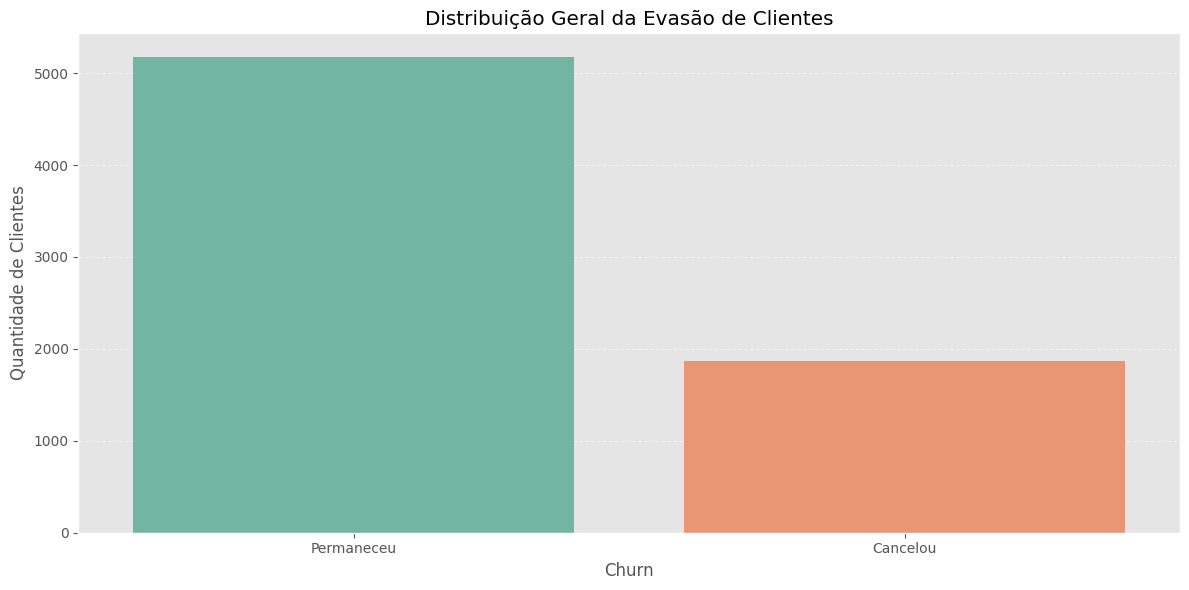

In [50]:
# 📊 Distribuição da Evasão com gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribuição Geral da Evasão de Clientes')
plt.ylabel('Quantidade de Clientes')
plt.xticks([0, 1], ['Permaneceu', 'Cancelou'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [47]:
# 📉 Proporção de churn
cancelou = df['Churn'].sum()
total = df['Churn'].notnull().sum()
proporcao = cancelou / total * 100

print(f"Aproximadamente {proporcao:.2f}% dos clientes cancelaram o serviço.")

Aproximadamente 26.54% dos clientes cancelaram o serviço.


In [48]:
print(f"""
🎯 Interpretação:

- Cerca de {proporcao:.2f}% dos clientes cancelaram seus serviços.
- Esse valor é considerado **alto** no mercado, indicando que a empresa enfrenta um problema sério de retenção.
- Clientes ativos (Churn = 0) representam a maioria, mas o volume de evasão é relevante e merece investigação.
""")


🎯 Interpretação:

- Cerca de 26.54% dos clientes cancelaram seus serviços.
- Esse valor é considerado **alto** no mercado, indicando que a empresa enfrenta um problema sério de retenção.
- Clientes ativos (Churn = 0) representam a maioria, mas o volume de evasão é relevante e merece investigação.



## 🔠 3.3 Evasão por Variáveis Categóricas

Aqui investigamos como a evasão varia de acordo com variáveis como `gender`, `contract`, `payment_method`, etc.

**Perguntas que queremos responder:**
- Certos perfis (ex: tipo de contrato ou método de pagamento) têm maior probabilidade de churn?
- Há diferenças de evasão entre gêneros ou faixas de serviço?

---

In [61]:
# 📊 Função para plotar a relação entre churn e qualquer variável categórica
def plot_churn_by_category(col):
    plt.figure(figsize=(15, 6))
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f"Evasão por {col}")
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel("Quantidade de Clientes")
    plt.legend(title='Churn', labels=['Permaneceu (0)', 'Cancelou (1)'])
    plt.xticks(rotation=30)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

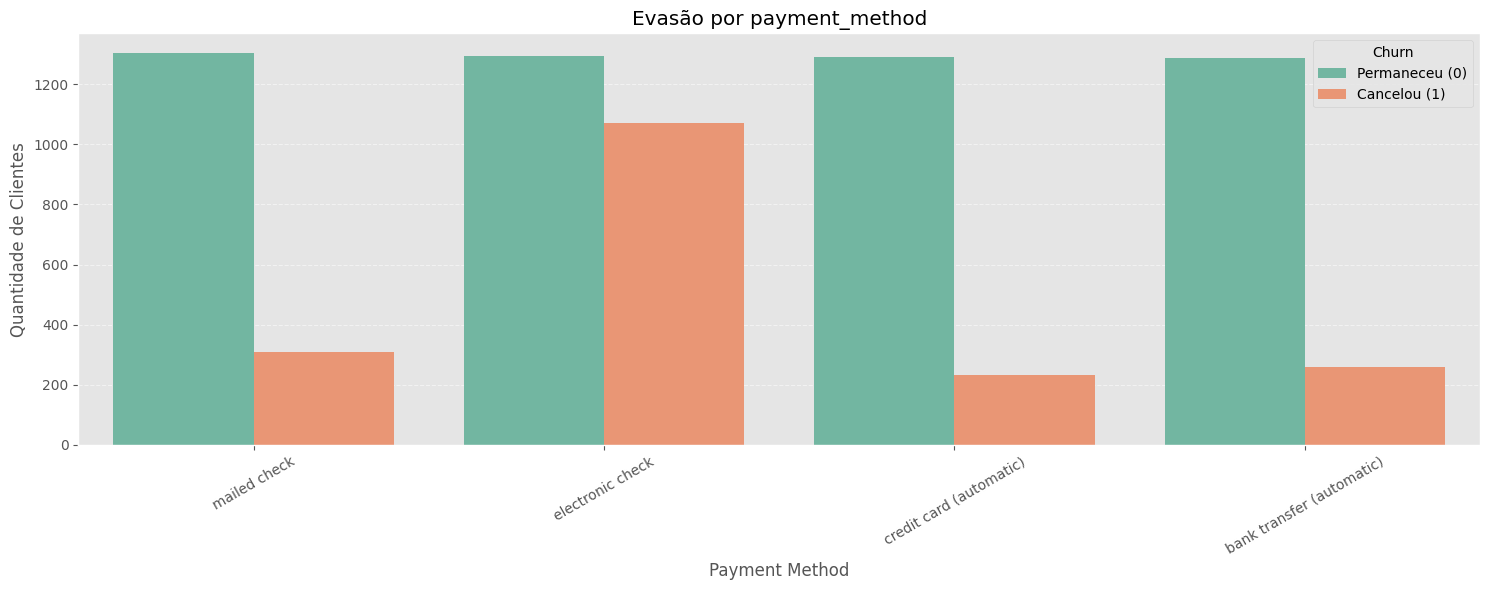

In [62]:
plot_churn_by_category('payment_method')

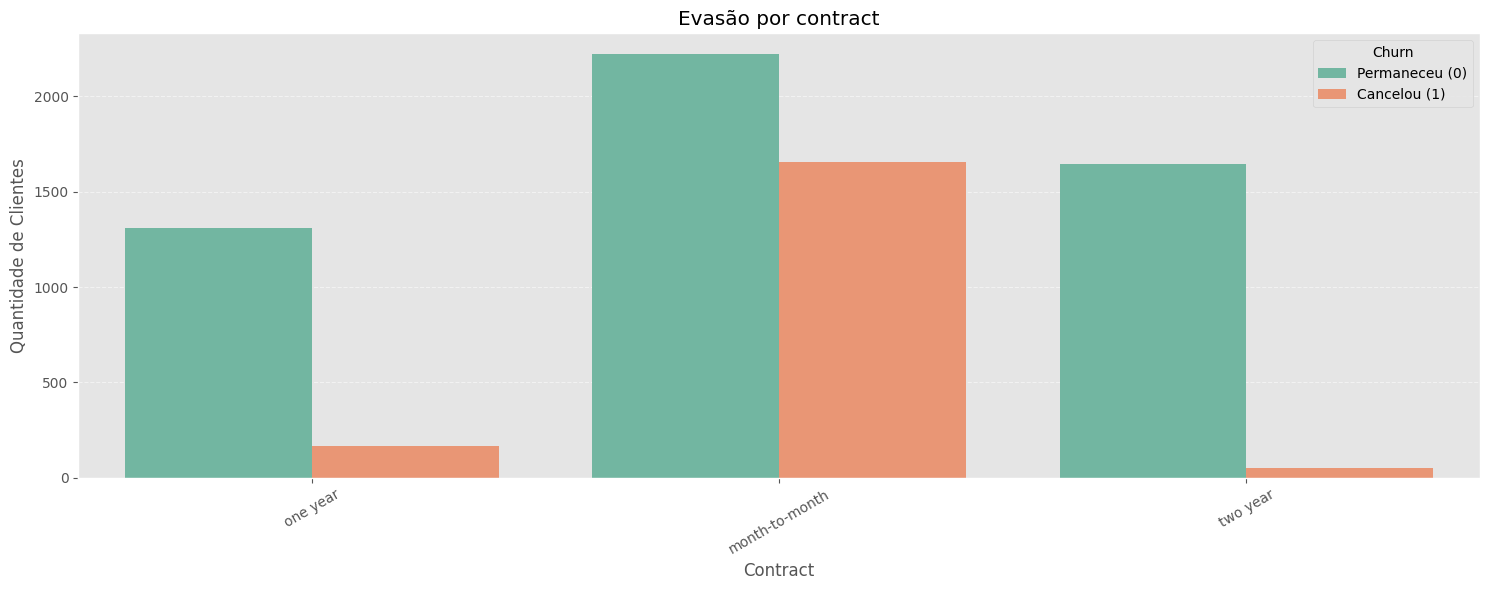

In [63]:
plot_churn_by_category('contract')

In [64]:
# 💡 Observação sobre churn por tipo de contrato
churn_by_contract = df.groupby('contract')['Churn'].mean().sort_values(ascending=False)

print(f"""
📊 Evasão por Tipo de Contrato:

- Contrato com maior churn: {churn_by_contract.index[0].capitalize()} ({churn_by_contract.iloc[0]*100:.2f}% de cancelamento)
- Contrato com menor churn: {churn_by_contract.index[-1].capitalize()} ({churn_by_contract.iloc[-1]*100:.2f}% de cancelamento)

🧠 Insight:
Clientes com contrato '{churn_by_contract.index[0]}' cancelam **muito mais** do que os que têm contrato '{churn_by_contract.index[-1]}'.
Isso sugere que contratos mais longos (como 'two year') ajudam na **retenção**.
""")


📊 Evasão por Tipo de Contrato:

- Contrato com maior churn: Month-to-month (42.71% de cancelamento)
- Contrato com menor churn: Two year (2.83% de cancelamento)

🧠 Insight:
Clientes com contrato 'month-to-month' cancelam **muito mais** do que os que têm contrato 'two year'. 
Isso sugere que contratos mais longos (como 'two year') ajudam na **retenção**.



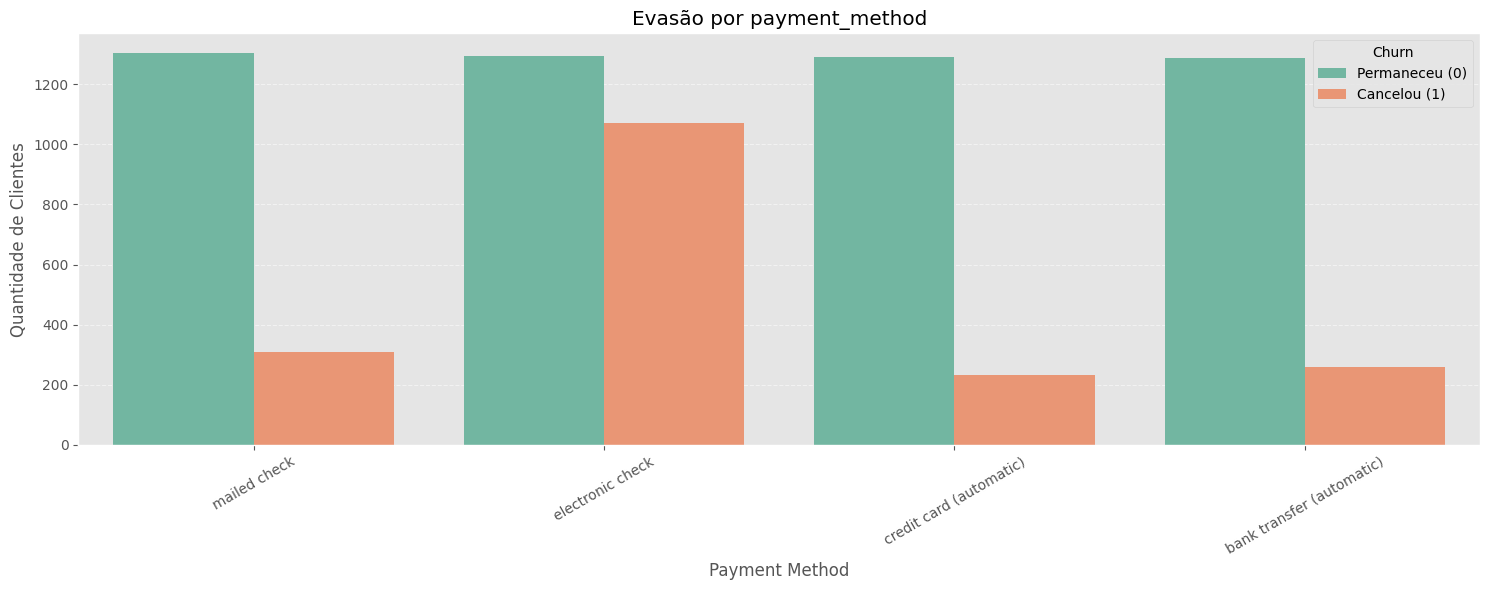

In [65]:
plot_churn_by_category('payment_method')

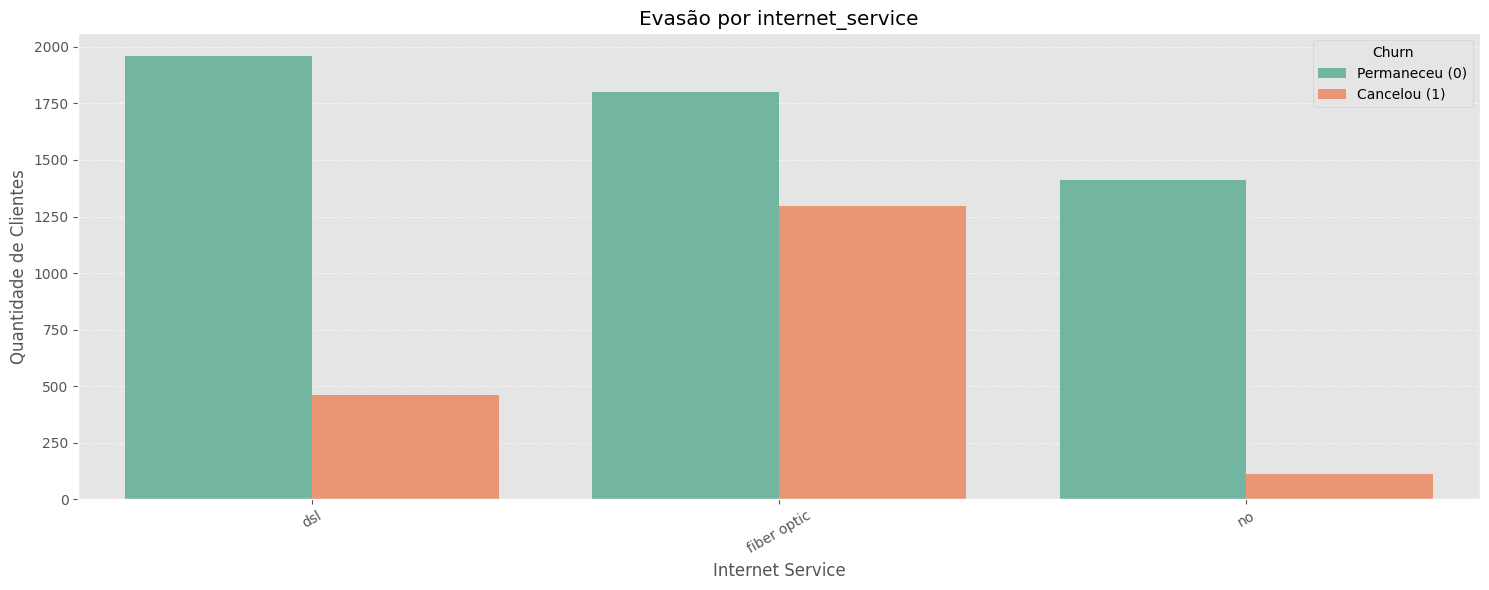

In [66]:
plot_churn_by_category('internet_service')

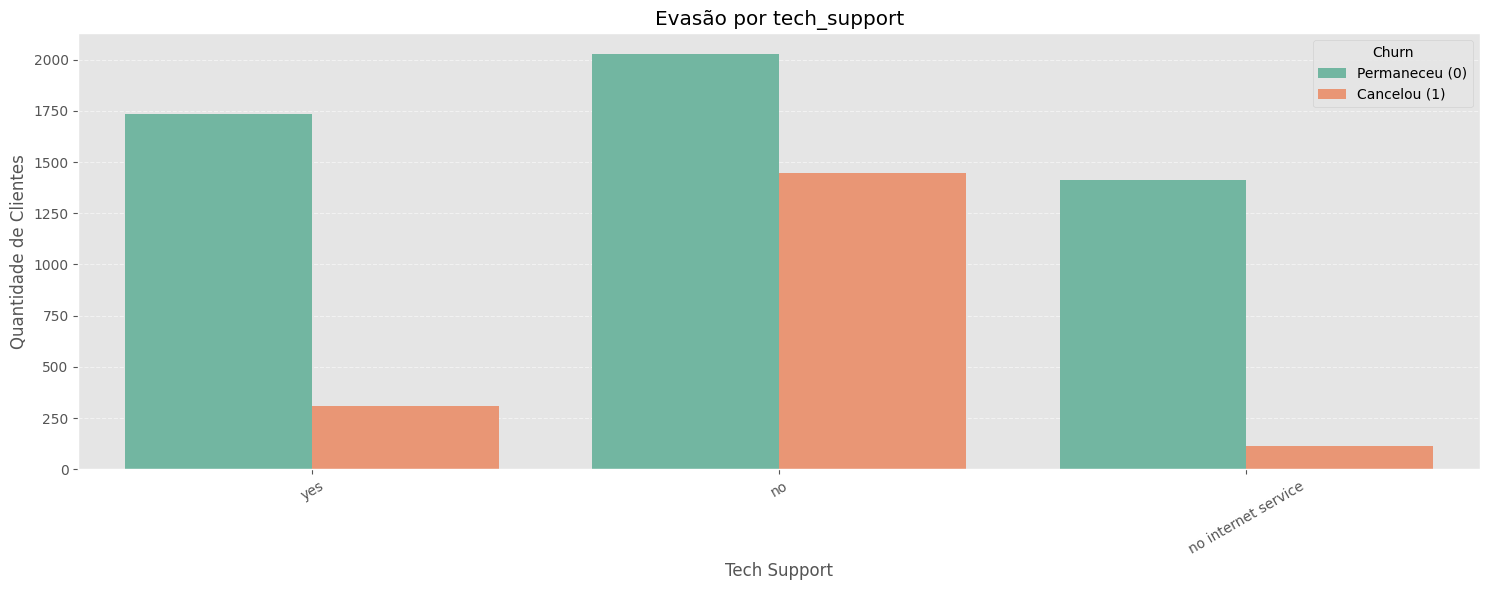

In [67]:
plot_churn_by_category('tech_support')

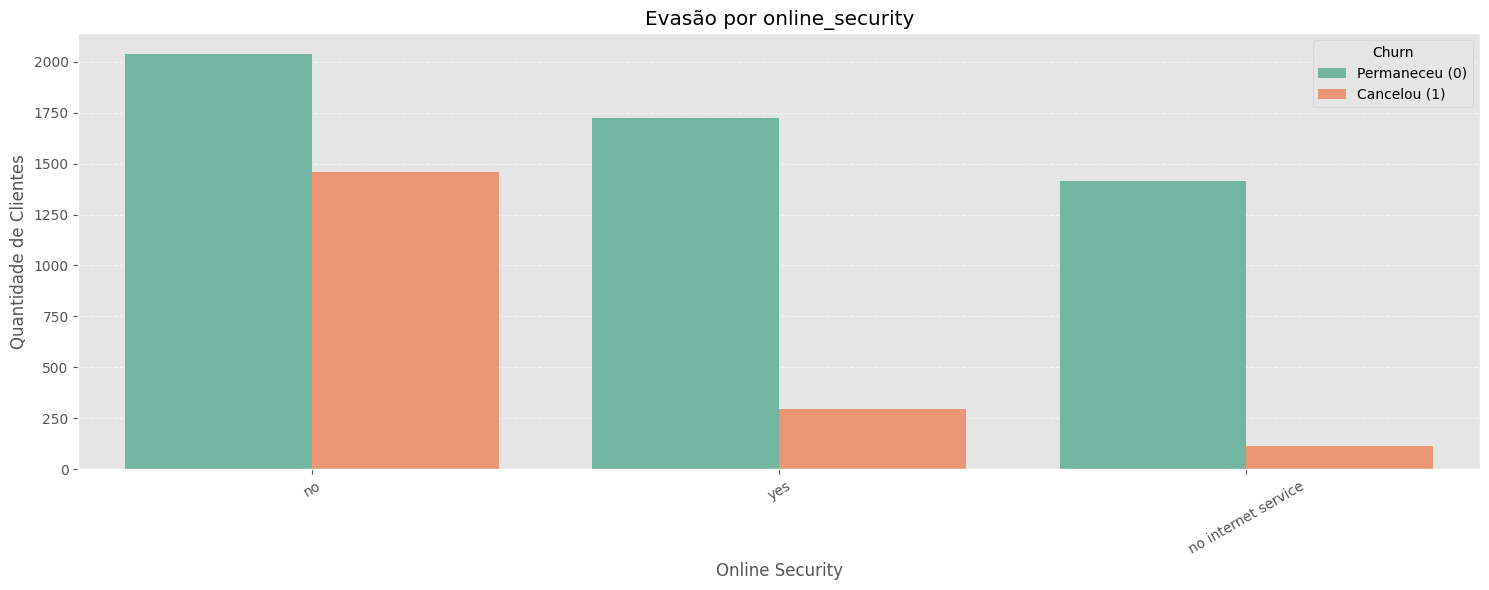

In [68]:
plot_churn_by_category('online_security')

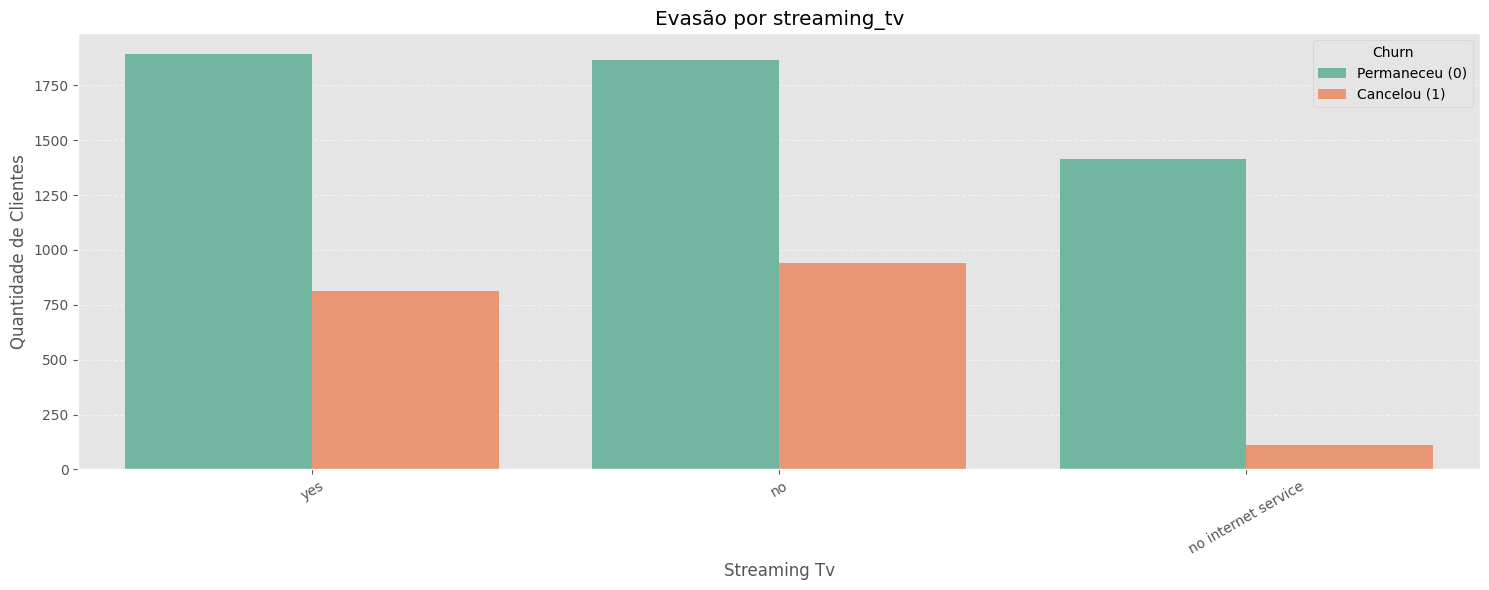

In [69]:
plot_churn_by_category('streaming_tv')

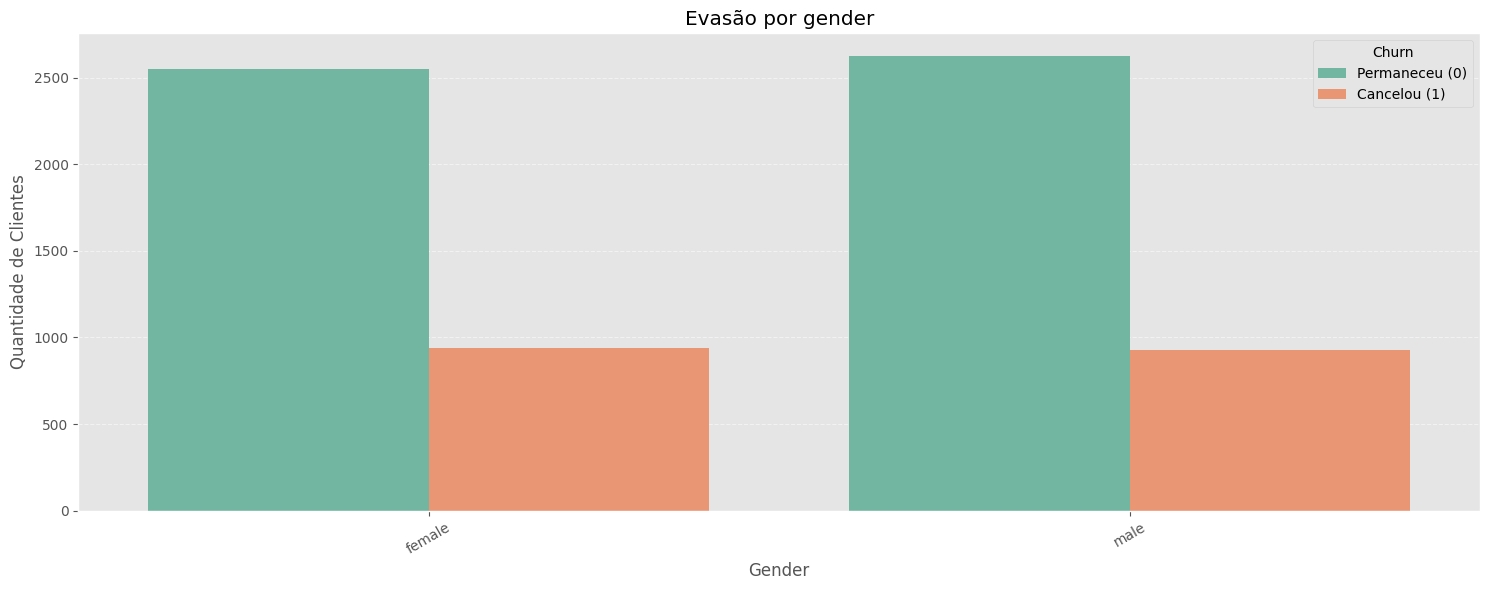

In [70]:
plot_churn_by_category('gender')

In [71]:
# 🧠 Função para gerar insights textuais com f-string
def churn_insight_por_categoria(col):
    churn_por_categoria = df.groupby(col)['Churn'].mean().sort_values(ascending=False)

    print(f"""
📊 Evasão por {col.replace('_', ' ').title()}:

- Categoria com maior churn: {churn_por_categoria.index[0].capitalize()} ({churn_por_categoria.iloc[0]*100:.2f}% de cancelamento)
- Categoria com menor churn: {churn_por_categoria.index[-1].capitalize()} ({churn_por_categoria.iloc[-1]*100:.2f}% de cancelamento)

🧠 Insight:
Clientes da categoria '{churn_por_categoria.index[0]}' apresentam maior tendência ao cancelamento, enquanto aqueles da categoria '{churn_por_categoria.index[-1]}' são mais propensos à retenção.
""")

In [72]:
churn_insight_por_categoria('payment_method')


📊 Evasão por Payment Method:

- Categoria com maior churn: Electronic check (45.29% de cancelamento)
- Categoria com menor churn: Credit card (automatic) (15.24% de cancelamento)

🧠 Insight:
Clientes da categoria 'electronic check' apresentam maior tendência ao cancelamento, enquanto aqueles da categoria 'credit card (automatic)' são mais propensos à retenção.



In [73]:
churn_insight_por_categoria('internet_service')


📊 Evasão por Internet Service:

- Categoria com maior churn: Fiber optic (41.89% de cancelamento)
- Categoria com menor churn: No (7.40% de cancelamento)

🧠 Insight:
Clientes da categoria 'fiber optic' apresentam maior tendência ao cancelamento, enquanto aqueles da categoria 'no' são mais propensos à retenção.



In [74]:
churn_insight_por_categoria('tech_support')


📊 Evasão por Tech Support:

- Categoria com maior churn: No (41.64% de cancelamento)
- Categoria com menor churn: No internet service (7.40% de cancelamento)

🧠 Insight:
Clientes da categoria 'no' apresentam maior tendência ao cancelamento, enquanto aqueles da categoria 'no internet service' são mais propensos à retenção.



In [75]:
churn_insight_por_categoria('online_security')


📊 Evasão por Online Security:

- Categoria com maior churn: No (41.77% de cancelamento)
- Categoria com menor churn: No internet service (7.40% de cancelamento)

🧠 Insight:
Clientes da categoria 'no' apresentam maior tendência ao cancelamento, enquanto aqueles da categoria 'no internet service' são mais propensos à retenção.



In [76]:
churn_insight_por_categoria('streaming_tv')


📊 Evasão por Streaming Tv:

- Categoria com maior churn: No (33.52% de cancelamento)
- Categoria com menor churn: No internet service (7.40% de cancelamento)

🧠 Insight:
Clientes da categoria 'no' apresentam maior tendência ao cancelamento, enquanto aqueles da categoria 'no internet service' são mais propensos à retenção.



## 🔢 3.4 Evasão por Variáveis Numéricas

Vamos observar como a evasão se distribui em relação a variáveis como `charges_total`, `charges_monthly`, `tenure`, e `daily_charges`.

**Perguntas que queremos responder:**
- Clientes com maior tempo de casa tendem a sair menos?
- Clientes com valores mais altos de conta estão mais propensos ao cancelamento?

---

In [79]:
# 📊 Função para comparar variáveis numéricas por churn
def plot_box_by_churn(numeric_col):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Churn', y=numeric_col, palette='Set2')
    plt.title(f'{numeric_col.replace("_", " ").title()} vs Churn')
    plt.xlabel('Churn (0 = Permaneceu, 1 = Cancelou)')
    plt.ylabel(numeric_col.replace("_", " ").title())
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

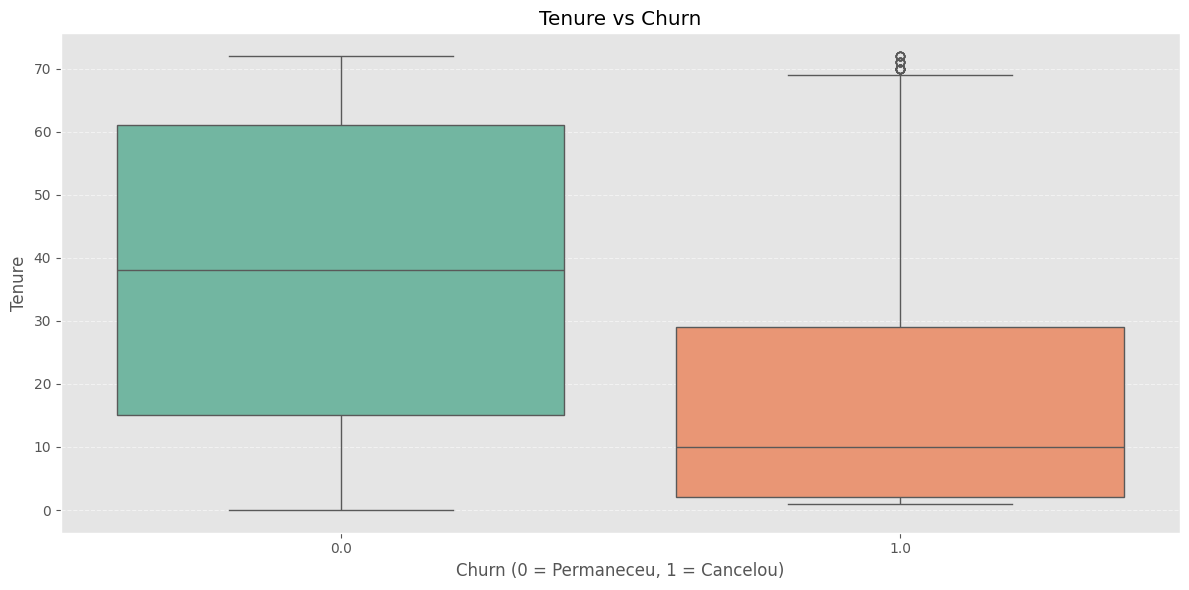

In [80]:
plot_box_by_churn('tenure')

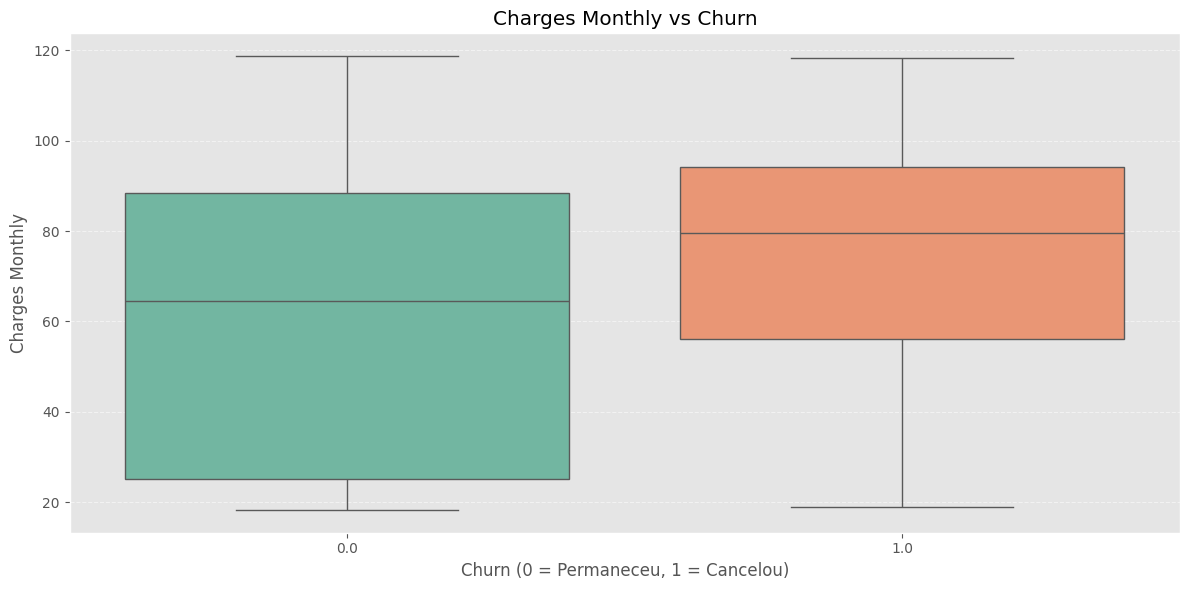

In [81]:
plot_box_by_churn('charges_monthly')

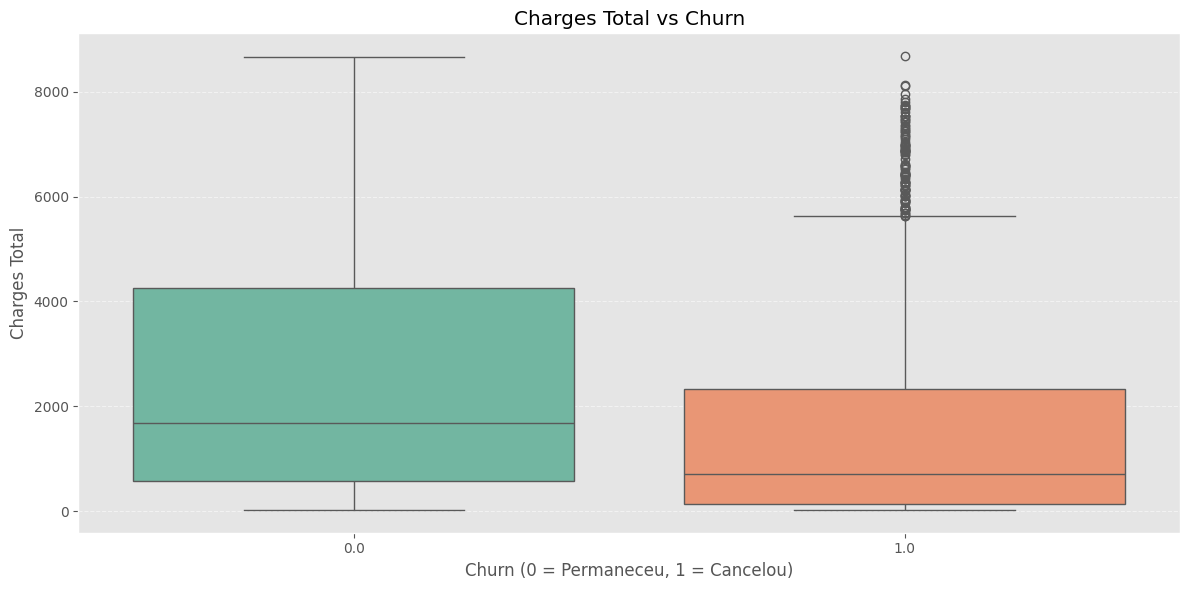

In [82]:
plot_box_by_churn('charges_total')

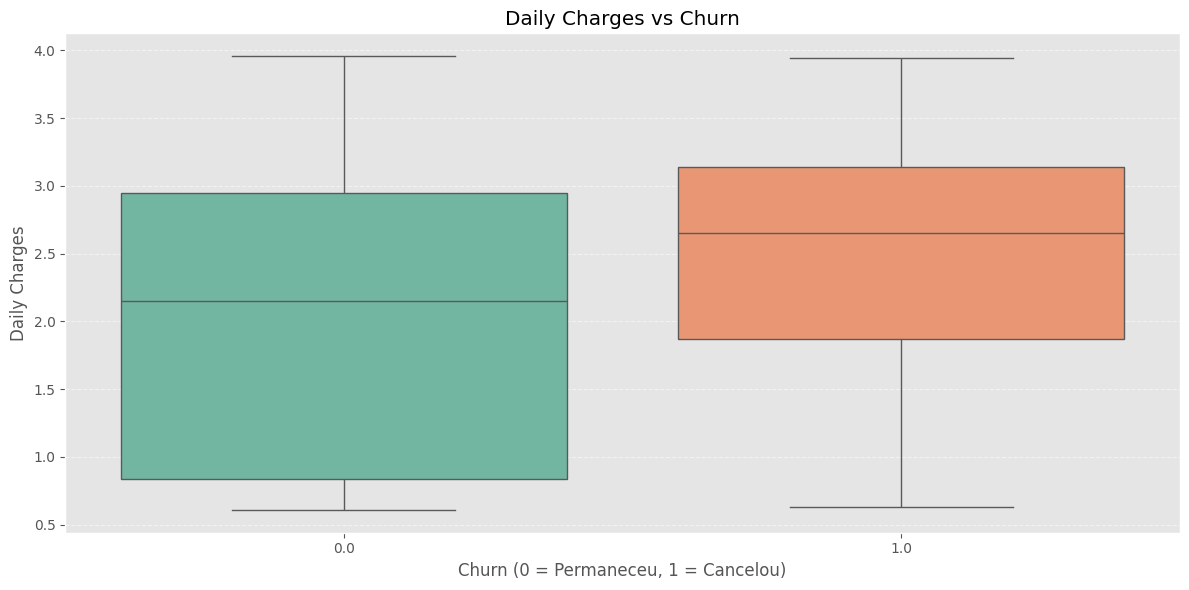

In [83]:
plot_box_by_churn('daily_charges')

In [84]:
# 🧠 Gera observação automática para variáveis numéricas com base em churn
def churn_insight_por_variavel_numerica(col):
    media_cancelou = df[df['Churn'] == 1][col].mean()
    media_ficou = df[df['Churn'] == 0][col].mean()

    print(f"""
📊 Comparação de {col.replace('_', ' ').title()} entre grupos:

- Média para clientes que **cancelaram**: {media_cancelou:.2f}
- Média para clientes que **permaneceram**: {media_ficou:.2f}

🧠 Insight:
Clientes que cancelaram tendem a ter valores de '{col.replace('_', ' ').lower()}' { 'menores' if media_cancelou < media_ficou else 'maiores' } do que os que permaneceram.
""")

In [85]:
churn_insight_por_variavel_numerica('tenure')


📊 Comparação de Tenure entre grupos:

- Média para clientes que **cancelaram**: 17.98
- Média para clientes que **permaneceram**: 37.57

🧠 Insight:
Clientes que cancelaram tendem a ter valores de 'tenure' menores do que os que permaneceram.



In [86]:
churn_insight_por_variavel_numerica('charges_total')


📊 Comparação de Charges Total entre grupos:

- Média para clientes que **cancelaram**: 1531.80
- Média para clientes que **permaneceram**: 2555.34

🧠 Insight:
Clientes que cancelaram tendem a ter valores de 'charges total' menores do que os que permaneceram.



## 🔗 3.5 (Extra) Correlação entre Variáveis

Como passo opcional, vamos explorar relações lineares entre variáveis numéricas e o churn.

**Perguntas que queremos responder:**
- Existe correlação entre `tenure` e `churn`?
- A quantidade de serviços contratados se relaciona com a evasão?

---

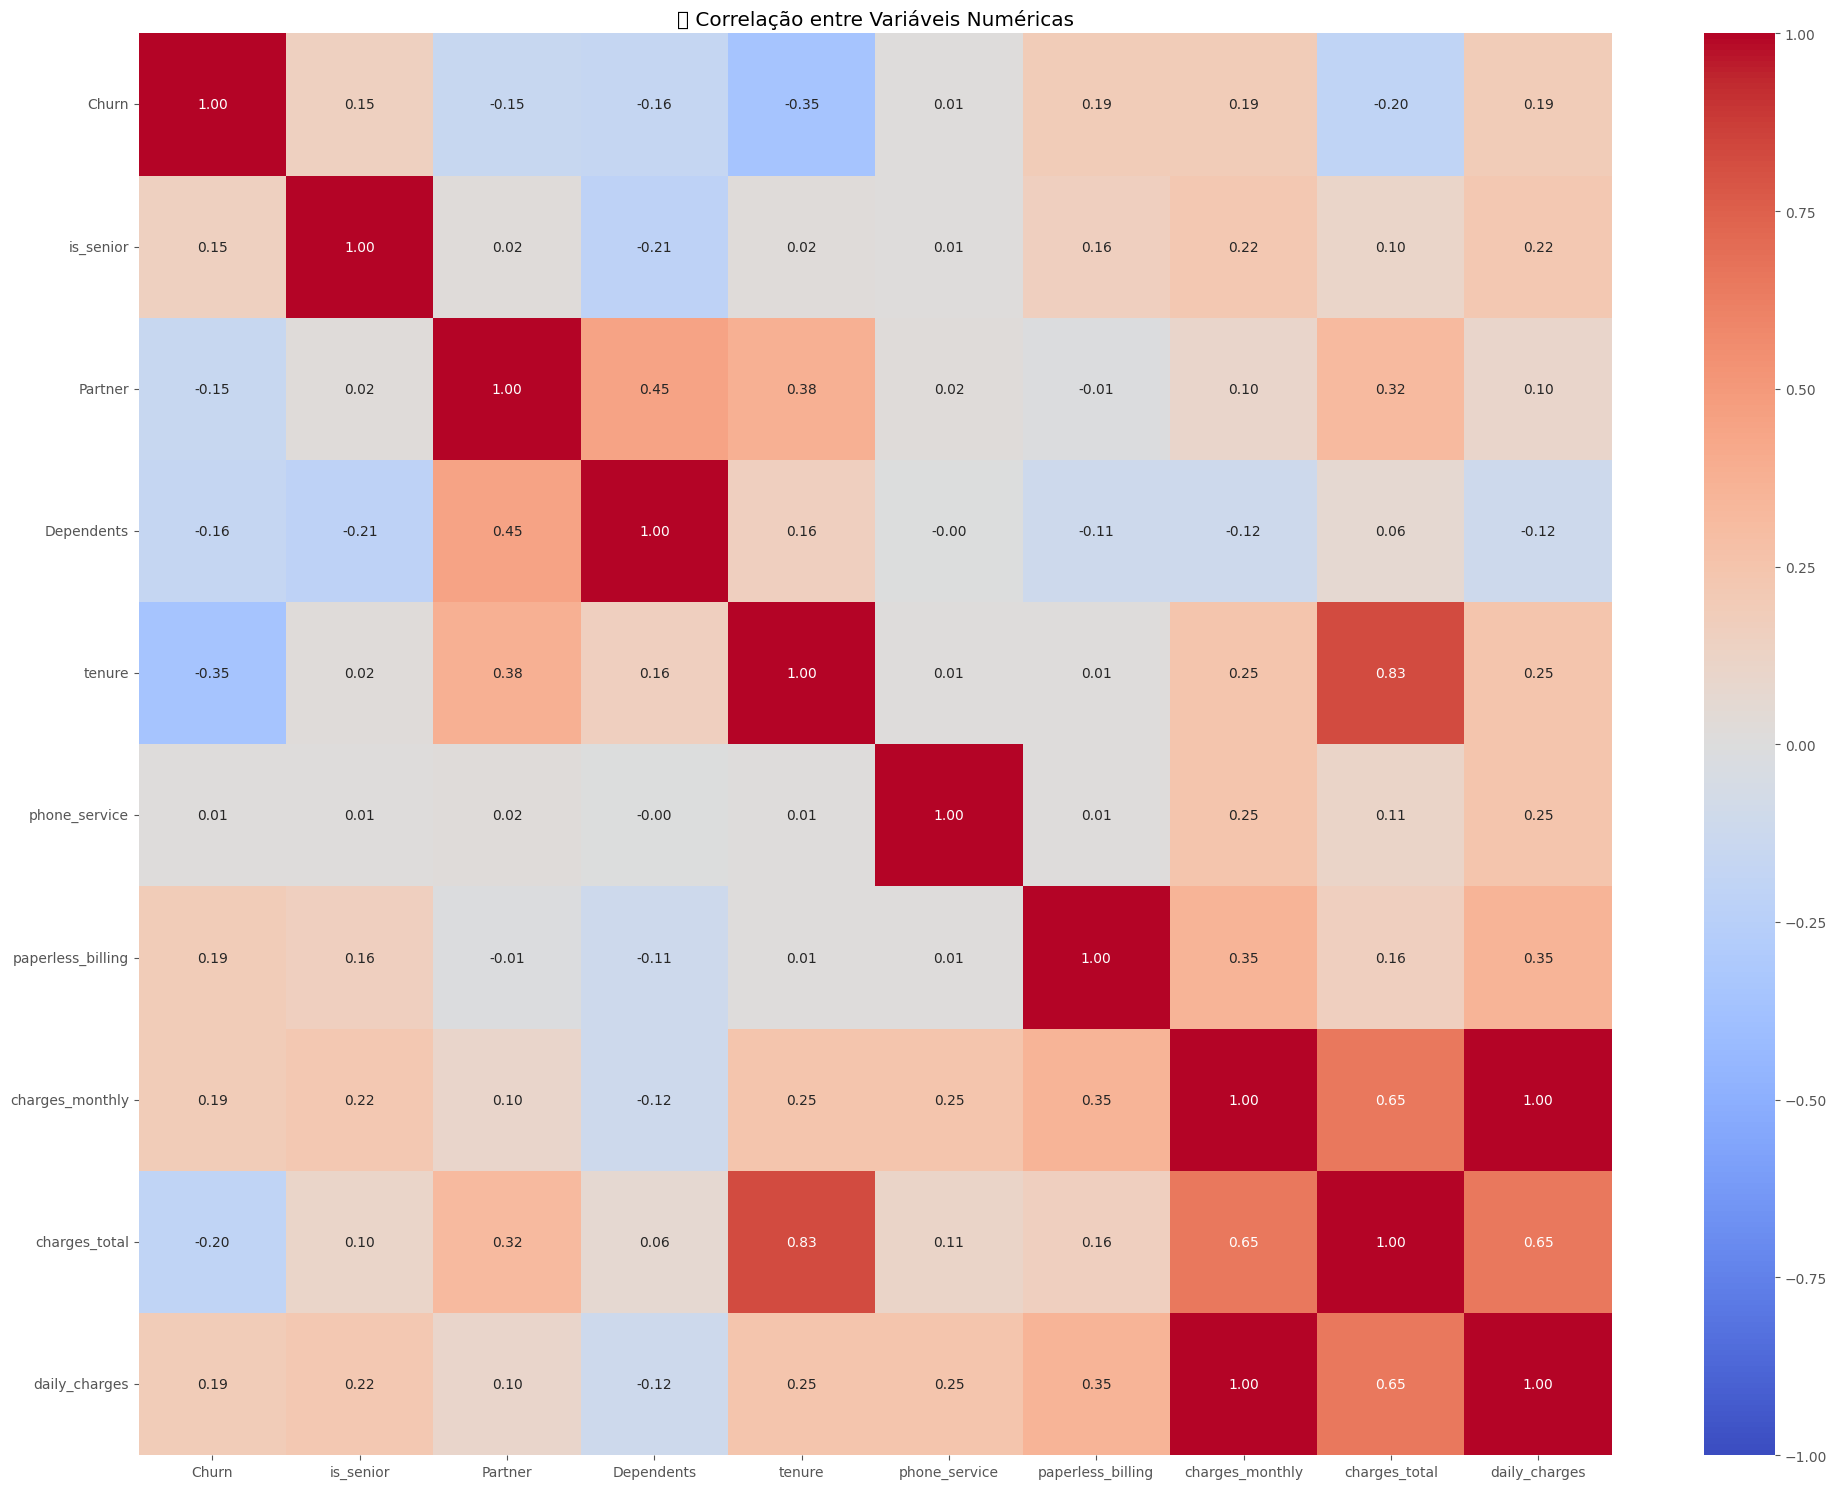

In [88]:
# 🔗 Selecionar apenas colunas numéricas
df_num = df.select_dtypes(include=['int64', 'float64'])

# 📊 Matriz de correlação
corr = df_num.corr()

# 🔥 Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("🔗 Correlação entre Variáveis Numéricas")
plt.tight_layout()
plt.show()

In [89]:
# 🧠 Interpretando as principais correlações com Churn
corr_com_churn = corr['Churn'].drop('Churn').sort_values()

# Top 3 correlações negativas
mais_negativas = corr_com_churn.head(3)
# Top 3 correlações positivas
mais_positivas = corr_com_churn.tail(3)

print(f"""
📊 Principais Correlações com Churn:

🔻 Correlações Negativas (quanto maior o valor, menor a chance de churn):
- {mais_negativas.index[0]}: {mais_negativas.iloc[0]:.2f}
- {mais_negativas.index[1]}: {mais_negativas.iloc[1]:.2f}
- {mais_negativas.index[2]}: {mais_negativas.iloc[2]:.2f}

🔺 Correlações Positivas (quanto maior o valor, maior a chance de churn):
- {mais_positivas.index[0]}: {mais_positivas.iloc[0]:.2f}
- {mais_positivas.index[1]}: {mais_positivas.iloc[1]:.2f}
- {mais_positivas.index[2]}: {mais_positivas.iloc[2]:.2f}

🧠 Insight:
A variável com maior correlação negativa com churn é '{mais_negativas.index[0]}', sugerindo que quanto mais ela aumenta, menor é a evasão. Já '{mais_positivas.index[-1]}' apresenta correlação positiva, indicando possível relação direta com cancelamento.
""")


📊 Principais Correlações com Churn:

🔻 Correlações Negativas (quanto maior o valor, menor a chance de churn):
- tenure: -0.35
- charges_total: -0.20
- Dependents: -0.16

🔺 Correlações Positivas (quanto maior o valor, maior a chance de churn):
- paperless_billing: 0.19
- daily_charges: 0.19
- charges_monthly: 0.19

🧠 Insight:
A variável com maior correlação negativa com churn é 'tenure', sugerindo que quanto mais ela aumenta, menor é a evasão. Já 'charges_monthly' apresenta correlação positiva, indicando possível relação direta com cancelamento.



# 🧾 Relatório Final – Análise de Evasão de Clientes (Churn)

## 🎯 Objetivo

O projeto teve como objetivo analisar os dados da operadora fictícia **Telecom X** para entender os principais fatores relacionados à evasão de clientes (churn). A partir de análises descritivas e exploratórias, buscou-se identificar perfis e padrões de comportamento associados ao cancelamento dos serviços.

---

## 🧹 Limpeza e Transformação dos Dados

- Os dados foram extraídos de um arquivo JSON e transformados de uma estrutura aninhada para um formato tabular.
- Foram tratadas inconsistências como valores ausentes em `Churn` e tipos incorretos em `charges_total`.
- As colunas foram padronizadas para `snake_case` e variáveis binárias foram convertidas para `0` e `1`.

---

## 📊 Principais Análises e Insights

- **Churn** atinge cerca de **26,5% dos clientes**, índice considerado **alto** para o setor.
- Clientes com **contrato mensal (month-to-month)** apresentaram o maior índice de evasão (**42,7%**).
- Clientes com contratos de **dois anos** tiveram churn **inferior a 3%**, indicando forte relação entre **tempo de fidelização** e retenção.
- Variáveis como `tenure` e `charges_total` mostraram correlação negativa com churn, enquanto `charges_monthly` e `paperless_billing` mostraram correlação positiva.
- Clientes com menor tempo de permanência e menor valor total gasto são os que mais cancelam.

---

## ✅ Recomendações Estratégicas

Com base nos padrões identificados, sugerimos as seguintes ações para redução do churn:

1. **Incentivar contratos de longo prazo** (ex: "dois anos") com benefícios exclusivos ou descontos progressivos.
2. **Criar campanhas de retenção para clientes novos**, principalmente nos primeiros 12 meses — período crítico de evasão.
3. **Monitorar clientes com contas mensais altas**, pois estão mais propensos a cancelar. Avaliar percepção de valor desses serviços.
4. **Avaliar o impacto da fatura digital**: usuários de `paperless_billing` têm maior churn. Isso pode indicar um perfil mais impaciente, digital-first — ideal para testes A/B com experiências personalizadas.
5. **Explorar perfis familiares com dependentes** como segmento estratégico — tendem a ser mais fiéis.

---

## 🧠 Conclusão

A análise permitiu identificar padrões claros de comportamento associados à evasão. O entendimento desses fatores é essencial para o desenvolvimento de estratégias mais direcionadas de retenção, que poderão ser aprofundadas com modelos preditivos em uma próxima etapa.